In [9]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
# SVC 支持向量机
from sklearn.svm import SVC

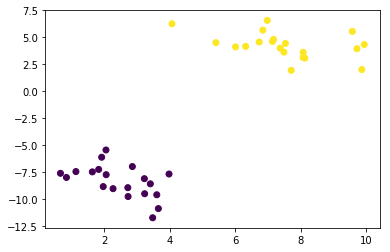

In [94]:
train,target = make_blobs(n_samples=40,n_features=2,centers=2,cluster_std=1.2)
plt.scatter(train[:,0],train[:,1],c=target)

In [95]:
# linear 线性内核
# rbf 非线性内核
# poly 
svc = SVC(kernel='linear')
svc.fit(train,target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [96]:
# 获取svc模型的系数
coefs = svc.coef_
intercept = svc.intercept_
coefs,intercept

(array([[0.13084939, 0.17064513]]), array([-0.34042644]))

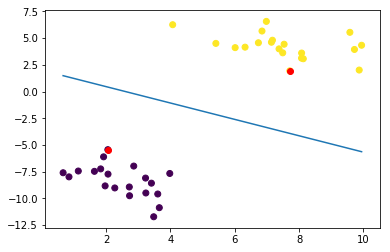

In [101]:
w = -coefs[0,0]/coefs[0,1]
k = -intercept/coefs[0,1]

x = np.linspace(train[:,0].min(),train[:,0].max())
y = w*x + k
plt.plot(x,y)

plt.scatter(train[:,0],train[:,1],c=target)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],c='red')

In [100]:
svc.support_vectors_

array([[ 2.05394342, -5.44012486],
       [ 7.71335703,  1.94050876]])

In [ ]:
f(x)=w*x + k
k = y-w*x

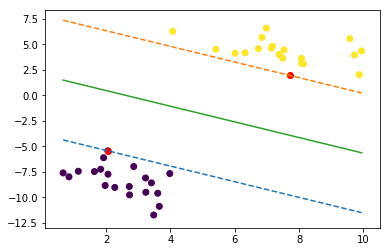

In [103]:
# 支持向量要取第一个点和最后一个点，因为支持向量可能存在多个
up_point = svc.support_vectors_[0]
bottom_point = svc.support_vectors_[-1]

k1 = up_point[1] - w*up_point[0]
k2 = bottom_point[1] - w*bottom_point[0]

y1 = w*x + k1
y2 = w*x + k2
plt.plot(x,y1,ls='--')
plt.plot(x,y2,ls='--')
plt.plot(x,y)
plt.scatter(train[:,0],train[:,1],c=target)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],c='red')

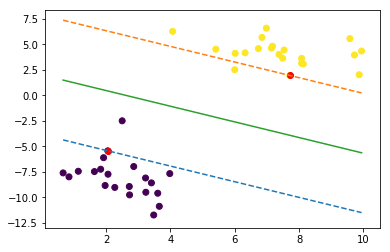

In [107]:
X_test = np.array([[2.5,-2.5],[6,2.5]])
plt.plot(x,y1,ls='--')
plt.plot(x,y2,ls='--')
plt.plot(x,y)
plt.scatter(train[:,0],train[:,1],c=target)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],c='red')

plt.scatter(X_test[:,0],X_test[:,1],c=y_)

In [106]:
y_ = svc.predict(X_test)